In [1]:
import numpy as np 

v1 = 5 #volts
v2 = 10 #volts
r = 1 #ohm

resistor_mat = np.array([
    [-r, -r, 0, 0], # top loop
    [r, 0, r, 0],   # bottom-left loop
    [0, r, 0 ,r],   # bottom-right loop
    [1, -1, -1, 1]  # junction rule
])

volt_vec = np.array([v1, -v2, v2, 0])
cur_vec = np.linalg.solve(resistor_mat, volt_vec)

print(cur_vec)

[-7.5  2.5 -2.5  7.5]


In [2]:
# n = 2
r1, r2, r3, r4 = 1, 1, 1, 1
vin = 5
resistor_mat = np.array([
    [+r1,   0,   0,   0, +r4],
    [+r1, +r2, +r3,   0,   0],
    [  0, +r2,   0, +r4,   0],
    [ +1,  -1,   0,  1,  -1],
    [ -1,  -1,   0,  +1,  +1]
])

volt_vec = np.array([vin, vin, vin, 0, 0])

eff_curr2 = np.linalg.solve(resistor_mat, volt_vec)
print(eff_curr2)
print(vin/np.sum(eff_curr2[0::3]))

[ 2.5  2.5 -0.   2.5  2.5]
1.0


In [3]:
#n = 3
def resistor_matrix3(r1, r2, r3, r4):
    return np.array([[r1, r1, 0, 0, 0, 0, 0],
                    [r1, 0, 0, 0, r3, 0, r4],
                    [0, r1, 0, r3, 0, r4, 0],
                    [0, 0, r2, 0, r3, r4, 0],
                    [1, -1, 0, 0, -1, 1, 0],
                    [0, 0, -1, -1, 0, 1, 0],
                    [1, -1, 0, 1, 0, 0, -1]])

volt_vec3 = np.array([5, 5, 5, 5, 0, 0, 0])
eff_curr3 = np.linalg.solve(resistor_matrix3(1, 1, 1, 1), volt_vec3)
print(eff_curr3)
print(5/np.sum(eff_curr3[0::5]))

[2.5   2.5   1.25  0.625 1.875 1.875 0.625]
1.1428571428571428


In [4]:
# n = 4, convention n/2, n, 3n/2, 2n+1
def resistor_matrix4(r1, r2, r3, r4):
    return np.array([[r1, r1, 0, 0, 0, 0, 0, 0, r4],
                     [r1, r1, 0, r2, 0, r3, 0, 0, 0],
                     [r1, 0, 0, r2, 0, 0, 0, r4, 0],
                     [r1, 0, r2, r2, r3, 0, 0, 0, 0],
                     [0, 0, r2, r2, 0, 0, r4, 0, 0],
                     [0, 0, -1, 0, 1, 0, 1, 0, 0],
                     [0, 1, 0, 0, 0, -1, 0, 0, -1],
                     [1, 0, 0, -1, 0, 0, 1, 0, -1],
                     [1, -1, 0, 0, -1, 0, 0, -1, 0]])

volt_vec4 = np.array([5, 5, 5, 5, 5, 0, 0, 0, 0])
eff_curr = np.linalg.solve(resistor_matrix4(1, 1, 1, 1), volt_vec4)
print(eff_curr)
print('Effective R:', vin/np.sum(eff_curr[0::6]))

[ 2.          1.33333333  1.33333333  2.         -0.33333333 -0.33333333
  1.66666667  1.          1.66666667]
Effective R: 1.3636363636363635


In [5]:
# n = 6, convention n/2, n, 3n/2, 2n+1
def resistor_matrix6(r1, r2, r3, r4):
    return np.array([[r1, r1, r1, 0, 0, 0, 0, 0, 0, 0, 0, 0, r4],
                     [r1, r1, r1, 0, 0, r2, 0, 0, r3, 0, 0, 0, 0],
                     [r1, r1, 0, 0, 0, r2, 0, 0, 0, 0, 0, r4, 0],
                     [r1, r1, 0, 0, r2, r2, 0, r3, 0, 0, 0, 0, 0],
                     [r1, 0, 0, 0, r2, r2, 0, 0, 0, 0, r4, 0, 0],
                     [r1, 0, 0, r2, r2, r2, r3, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, r2, r2, r2, 0, 0, 0, r4, 0, 0, 0],
                     [0, 0, 0, -1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                     [0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1],
                     [1, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, -1],
                     [1, -1, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0],
                     [0, 1, -1, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0],
                     [0, 0, 0, 1, -1, 0, 0, 1, 0, 0, 1, 0, 0]])

volt_vec6 = np.array([5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0])
eff_curr6 = np.linalg.solve(resistor_matrix6(1, 1, 1, 1), volt_vec6)

print(eff_curr6)
print("Effective Resistance:", vin/np.sum(eff_curr6[0::9]), "ohms")

[ 1.56862745  1.17647059  0.98039216  0.98039216  1.17647059  1.56862745
 -0.29411765 -0.49019608 -0.29411765  1.2745098   0.68627451  0.68627451
  1.2745098 ]
Effective Resistance: 1.7586206896551724 ohms


In [6]:
# overall case for even n
import matplotlib.pyplot as plt
def current_matrix(n, r1, r2, r3, r4):
    matrix = np.zeros((2*n+1, 2*n+1)).tolist()   #starting with an empty array seems to be more tedious.
    if n % 2 == 0:
        i = 0 #index for replacing row elements
        q = 0 #index for going through the entire matrix
        #All Kirchoff's Loop Rules
        while i < (n/2)+ 1: # all r4 paths
            j = 0
            if i <= (n/2):
                while j < (n/2) - i: 
                    matrix[q][j] = r1
                    j += 1
            if i > 0:
                j = 0
                while j < i:
                    matrix[q][n-j-1] = r2
                    j += 1
            matrix[q][2*n-i] = r4
            i += 1
            q += 1
        i = 0
        while i < n/2: # all r3 paths
            j = 0
            while j < (n/2) - i: 
                matrix[q][j] = r1
                j += 1
            j = 0
            while j <= i:
                matrix[q][n-j-1] = r2
                j += 1
            matrix[q][int((3*n)/2)-i-1] = r3
            i += 1
            q += 1
        i = 0
        #Almost all Kirchoff's Junction Rules
        while i < n/2: #The Top Junctions
            if q == 2*n:
                break
            j = 0            
            matrix[q][i]=1
            matrix[q][i+1]=matrix[q][n+i]=matrix[q][int((3*n)/2)+1+i] = -1
            if i == (n/2)-1:
                matrix[q][i+1] = 0
            i+= 1
            q+= 1           
        i = 0
        while i < (n/2)-1: #The Bottom Junctions
            if q == 2*n:
                break
            matrix[q][int(n/2)+i-1]=matrix[q][int((3*n)/2)+i]=matrix[q][n+i]=1
            matrix[q][int(n/2)+i]=-1
            if i == 0:
                matrix[q][int(n/2)+i-1] = 0
            i += 1
            q += 1           
        #The Last Junction Rule. Separate from all other patterns.
        matrix[2*n][0] = matrix[2*n][int((3*n)/2)] = 1
        matrix[2*n][n-1] = matrix[2*n][2*n] = -1
    """
    else: #Odd n case. Doesn't work at time of submission 2025-09-11.
        i = 0
        q = 0
        #All Kirchoff's Loop Rule equations
        while i < int((n + 1)/2) + 1: #Without bottom resistors.
            j = 0
            while j < int((n + 1)/2):
                matrix[q][j] = r1
                j += 1
            if i > 0:
                matrix[q][int((n+1)/2)-i] = 0
                matrix[q][int((3*n/2)+(1/2))-i] = r3
                matrix[q][2*n+1-i] = r4
            i += 1
            q += 1
        i = 0
        while i < int((n+1)/2 - 1): #Bottom resistors.
            j = 0
            while j < int((n + 1)/2):
                matrix[q][j] = r1
                j += 1
            matrix[q][i] = matrix[q][i+1] = 0
            matrix[q][int((n+1)/2)+i] = r2
            matrix[q][n+1+i] = r3
            matrix[q][int((3*n/2)+(1/2))+i] = r4
            i += 1
            q += 1
        i = 0
        #All Junction Rules
        while i < int((n-1)/2): #Top Junctions
            if q == 2*n:
                break
            matrix[q][i] = matrix[q][n+i] = 1
            matrix[q][i+1] = matrix[q][int((3*n)/2+(3/2)+i)] = -1
            i += 1
            q += 1
        i = 0
        while i < int((n+1)/2): #Bottom Junctions
            if q == 2*n:
                break
            matrix[q][int((n+1)/2)-1+i] = matrix[q][int((3*n)/2+(1/2)+i)] = 1
            matrix[q][int((n+1)/2)+i] = matrix[q][n-1+i] = -1
            if i == 0:
                matrix[q][int((n+1)/2)-1+i] = 0
            i += 1
            q += 1
        #Last Junction Rule
        matrix[2*n][0] = matrix[2*n][int((3*n/2)+(3/2))] = 1
        matrix[2*n][int((3*n/2)+(1/2))] = matrix[2*n][int((n+1)/2)] = -1
    """
    return np.array(matrix)

def voltvector(n, v):
    matrix = []
    m = 0
    while m < (n + 1): # for all loop rule equations
        matrix.append(v)
        m += 1   
    while m < (2*n+1): # for all junction rule equations
        matrix.append(0)
        m += 1    
    return np.array(matrix)

r1 = r2 = r3 = r4 = 1
vin = 5
n = int(input())
eff_i = np.linalg.solve(current_matrix(n, r1, r2, r3, r4), voltvector(n, vin))   
eff_r = vin/np.sum(eff_i[0::int(3*n/2)])
print("n =", n, ";", "Effective Resistance:", eff_r, "ohms")

 8


n = 8 ; Effective Resistance: 2.157894736842105 ohms


[0.19998517 0.55974933]


Text(0, 0.5, 'Effective Resistance (Ohms)')

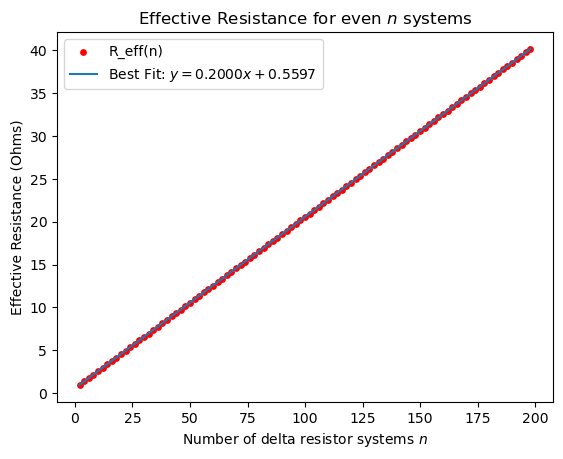

In [7]:
nlist = np.arange(2, 200, 2)
ilist = []
rlist = []
k = 0
for u in nlist:
    ilist.append(np.linalg.solve(current_matrix(u, r1, r2, r3, r4), voltvector(u, vin)))

while k < int(nlist.size):
    rlist.append(vin/np.sum(ilist[k][0::int(3*nlist[k]/2)]))
    k += 1

x = np.array(nlist)
y = np.array(rlist)
bestfit = np.polyfit(x, y, 1)
y2 = float(bestfit[0])*x + float(bestfit[1])
print(bestfit)
plt.scatter(x, y, s = 15, c = 'Red', label='R_eff(n)')
plt.plot(x, y2, label=r'Best Fit: $y = 0.2000x + 0.5597$')
plt.legend()
plt.title(r'Effective Resistance for even $n$ systems')
plt.xlabel(r'Number of delta resistor systems $n$')
plt.ylabel('Effective Resistance (Ohms)')